## Aufgabe 1

In [77]:
import numpy as np
import nnwplot
from matplotlib import pyplot as plt

In [78]:
def ErrorRate(Y, T):
    if Y.ndim == 1 or Y.shape[0] == 1:
        errors = Y != T
        return errors.sum() / Y.size
    else:  # für mehrere Ausgaben in one-hot Kodierung:
        # Dies brauchen Sie jetzt noch nicht nachzuvollziehen.
        errors = Y.argmax(0) != T.argmax(0)
        return errors.sum() / Y.shape[1]

In [79]:
class SLN:
    def __init__(self, dIn, cOut):
        np.random.seed(42)
        self._W = np.random.randn(dIn, cOut) / np.sqrt(dIn)
        self._b = np.zeros((1, cOut))

    def neuron(self, X):
        net = np.dot(X, self._W) + self._b
        return net > 0

    def deltaTrain(self, X, T, eta, maxIter, maxErrorRate):
        n_samples = X.shape[0]

        for epoch in range(maxIter):
            # Neuron Ergebnis
            Y = self.neuron(X)
            delta = (T - Y)

            # Aktualisierung von W
            Wd = (delta.T @ X).T / n_samples
            self._W += eta * Wd
            # print("W", self._W.shape)

            # Aktualisierung des Bias
            self._b += eta * np.mean(delta, axis=0, keepdims=True)

            # Trennlinie nach jeder Iteration plotten:
            # plt.ion()
            # nnwplot.plotTwoFeatures(X, T, self.neuron)
            # plt.pause(0.05)

            error = ErrorRate(Y.T, T.T)
            if error < maxErrorRate:
                break
        print("Training finished in epoch", epoch + 1, "with error", error)


#### e) UND-Gatter

In [80]:
und = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
X = und[:, :2]
T = np.array(und[:, 2], ndmin=2).T
sln = SLN(2, 1)
sln.deltaTrain(X, T, 0.5, 100, 0.05)
sln.neuron(X)

Training finished in epoch 8 with error 0.0


array([[False],
       [False],
       [False],
       [ True]])

#### f) Iris

Training finished in epoch 2332 with error 0.0


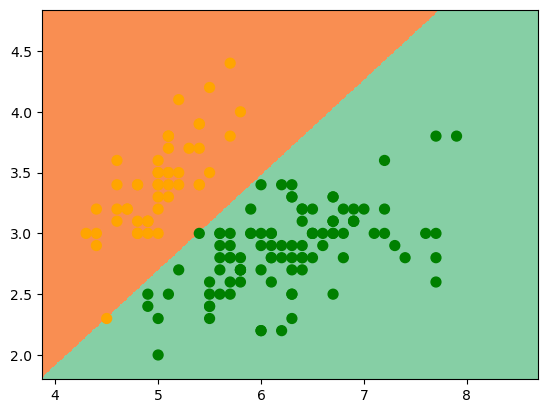

In [81]:
iris = np.loadtxt("iris.csv", delimiter=",")
X = iris[:, :2]
T = np.array(iris[:, 4], ndmin=2).T
T2 = (T > 0).astype(float)

sln = SLN(2, 1)
sln.deltaTrain(X, T2, 0.4, 100000, 0.005)
nnwplot.plotTwoFeatures(X, T2, sln.neuron)

#### g)

Training finished in epoch 100000 with error 0.26


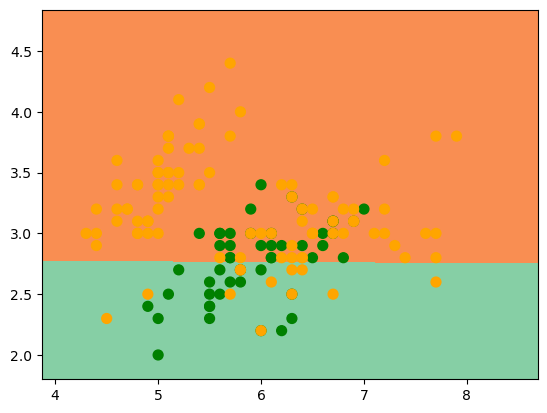

In [82]:
T2 = (T == 1).astype(float)

sln = SLN(2, 1)
sln.deltaTrain(X, T2, 0.4, 100000, 0.05)
nnwplot.plotTwoFeatures(X, T2, sln.neuron)

Training finished in epoch 100000 with error 0.25333333333333335


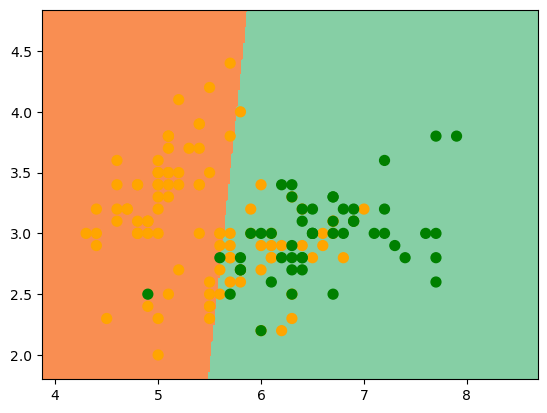

In [83]:
T2 = (T == 2).astype(float)

sln = SLN(2, 1)
sln.deltaTrain(X, T2, 0.4, 100000, 0.05)
nnwplot.plotTwoFeatures(X, T2, sln.neuron)